In [1]:
import pandas as pd

In [38]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [40]:
# Question 1
n_companies = len(pd.unique(df["Company Name"]))
print("There are", n_companies, "companies represented in the data set")

There are 439 companies represented in the data set


In [41]:
# Question 2
jobs = df.loc[(df["City"] == "Queens") | (df["City"] == "QUEENS"), "Job created"].sum()
print("Total number of jobs created for Queens city are", jobs)

Total number of jobs created for Queens city are 90.0


In [42]:
# Question 3
domain_names = df['company email'].str.split('@').str[1]
n_domains = len(pd.unique(domain_names.dropna()))
print("The number of unique email domains in the dataset are", n_domains)

The number of unique email domains in the dataset are 356


In [43]:
# Question 4
NTA_5 = df.groupby('NTA').filter(lambda x: len(x) > 4)
NTA_data = NTA_5[["NTA", "Total Savings", "Job created"]]
col = {"Total Savings": "Average Total Savings", "Job created": "Total Jobs created"}
NTA_agg = NTA_data.groupby('NTA').agg({'Total Savings':'mean', 'Job created':'sum'}).rename(columns = col)
NTA_agg.to_csv('NTA_agg.csv')

<AxesSubplot:xlabel='Total Jobs created', ylabel='Average Total Savings'>

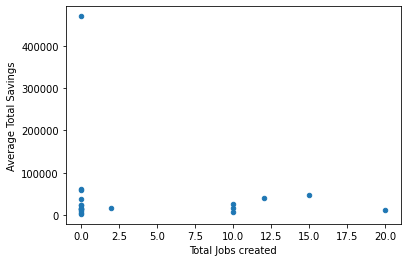

In [44]:
# Question 5
NTA_agg.plot.scatter(x = 'Total Jobs created', y = 'Average Total Savings')

<AxesSubplot:xlabel='Total Jobs created', ylabel='Average Total Savings'>

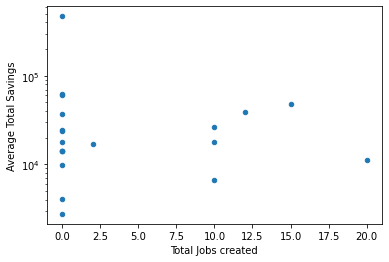

In [45]:
# Question 6
NTA_agg.plot.scatter(x = 'Total Jobs created', y = 'Average Total Savings', logy=True)

<AxesSubplot:ylabel='Frequency'>

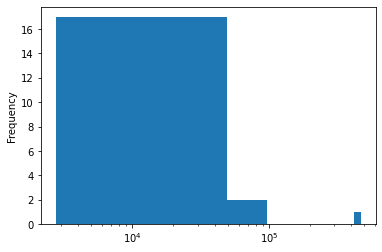

In [46]:
# Question 7
NTA_agg['Average Total Savings'].plot(kind = 'hist', logx = True)

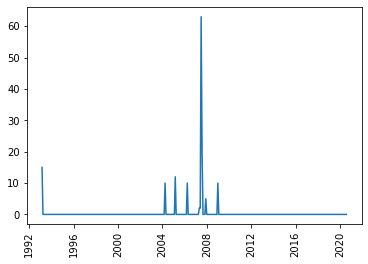

In [68]:
# Question 8
import matplotlib.pyplot as plt
df['Effective Date2'] = pd.to_datetime(df['Effective Date'])
cols = {'Effective Date2':'Month Data', 'Job created':'Total jobs created'}
jobs = df.groupby(pd.Grouper(key = 'Effective Date2', freq = 'M')).agg({'Job created':'sum'}).reset_index().rename(columns = cols)

plt.plot(jobs['Month Data'], jobs['Total jobs created'])
plt.xticks(rotation='vertical')
plt.show()